<a href="https://colab.research.google.com/github/abdinegara783/Sentiment_Analysis_Research2024/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <h1><strong>Prediksi Sentiment Analisis Masyarakat Terhadap Pemilihan Presiden 2024 Menggunakan Bidirectional Long Short Term Memory (BiLSTM)</strong></h1>
</center>


---
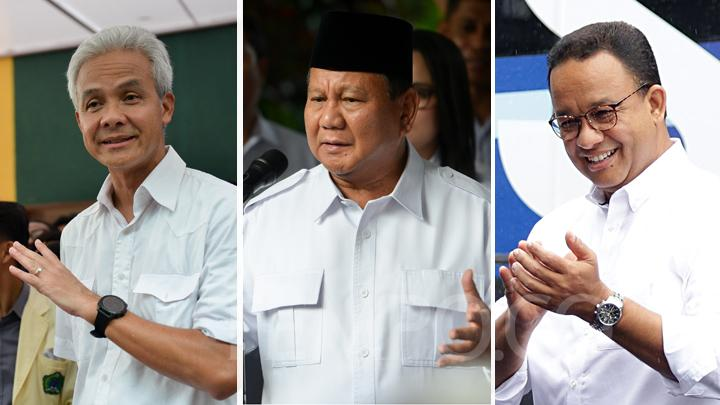



## **Import Dependences**


In [18]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from plotly import graph_objs as go
#from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import load_model

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## **Read CSV file**

Data ini merupakan suatu data berisi tweet masyarakat yang di tukukan untuk setiap masing masing paslon dengan keterangan sebagai berikut:
*   `data_anis`: Berisi **tweet** yang di tujukan ke calon presiden **anis baswedan**
*   `data_prab`: Berisi **tweet** yang di tujukan ke calon presiden **Prabowo Subianto**
*   `data_ganj`: Berisi **tweet** yang di tujukan ke calon presiden **Ganjar Pranowo**




In [19]:
data_anis = pd.read_csv('/content/drive/MyDrive/FIle Skripsi Evant/Hasil Analisis/Anies Baswedan.csv')
data_prab = pd.read_csv('/content/drive/MyDrive/FIle Skripsi Evant/Hasil Analisis/Prabowo Subianto.csv')
data_ganj = pd.read_csv('/content/drive/MyDrive/FIle Skripsi Evant/Hasil Analisis/Ganjar Pranowo.csv')

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
data_anis.head(5)

,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,tweet_tokens,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed,label
0,0,2023-04-16 10:04:35+00:00,2023-03-27 08:59:57+00:00,1.640000e+18,981,531,22,NaN,anies president info,"['anies', 'president', 'info']","['anies', 'president', 'info']","['anies', 'president', 'info']","['anies', 'president', 'info']",Positive
1,1,2023-04-16 10:00:01+00:00,2012-08-21 07:34:04+00:00,7.710306e+08,10702,123,30121,"Palmerah, Jakarta",gerindra party politician sandiaga uno answers...,"['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...","['gerindra', 'party', 'politician', 'sandiaga'...",Positive
2,2,2023-04-16 09:14:46+00:00,2011-09-27 05:22:24+00:00,3.807551e+08,11,35,230,North Jakarta,"mr. anies continued, we will guard him until h...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr.', 'anies', 'continued', ',', 'we', 'will...","['mr', 'anies', 'continued', '', 'we', 'will',...",Positive
3,3,2023-04-16 07:03:05+00:00,2017-10-19 12:32:28+00:00,9.210000e+17,37,47,2670,Jakarta,may allah swt save the nation and state of the...,"['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...","['may', 'allah', 'swt', 'save', 'the', 'nation...",Positive
4,4,2023-04-16 06:03:59+00:00,2022-06-28 07:03:37+00:00,1.540000e+18,6,129,766,"Lebak, Banten","poor chotimah, uncle anies, that's why my fami...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', ',', 'uncle', 'anies', ',...","['poor', 'chotimah', '', 'uncle', 'anies', '',...",Positive


In [22]:
data_prab.head(5)

,Unnamed: 0.1,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,tweet_tokens,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed,label
0,0,2023-04-16 09:44:01+00:00,2018-07-07 09:43:19+00:00,1.020000e+18,477,337,12568,Khoiril Anwar,gemira and semeton bali muslims declare suppor...,"['gemira', 'and', 'semeton', 'bali', 'muslims'...","['gemira', 'and', 'semeton', 'bali', 'muslims'...","['gemira', 'and', 'semeton', 'bali', 'muslims'...","['gemira', 'and', 'semeton', 'bal', 'muslims',...",Positive
1,1,2023-04-16 09:27:10+00:00,2019-10-29 04:40:11+00:00,1.190000e+18,27910,20171,63723,NaN,fahnoor inismyname that's why we support the p...,"['fahnoor', 'inismyname', 'that', ""'s"", 'why',...","['fahnoor', 'inismyname', 'that', ""'s"", 'why',...","['fahnoor', 'inismyname', 'that', ""'s"", 'why',...","['fahnoor', 'inismyname', 'that', 's', 'why', ...",Positive
2,2,2023-04-16 08:32:06+00:00,2022-12-16 05:02:00+00:00,1.600000e+18,144,114,6596,NaN,"this time, jokowi's quota for wrinkles on his ...","['this', 'time', ',', 'jokowi', ""'s"", 'quota',...","['this', 'time', ',', 'jokowi', ""'s"", 'quota',...","['this', 'time', ',', 'jokowi', ""'s"", 'quota',...","['this', 'time', '', 'jokowi', 's', 'quota', '...",Positive
3,3,2023-04-16 08:19:16+00:00,2016-01-11 23:57:34+00:00,4.745574e+09,67,99,7395,NaN,"happy birthday to kopassus, may the spirit of ...","['happy', 'birthday', 'to', 'kopassus', ',', '...","['happy', 'birthday', 'to', 'kopassus', ',', '...","['happy', 'birthday', 'to', 'kopassus', ',', '...","['happy', 'birthday', 'to', 'kopassus', '', 'm...",Positive
4,4,2023-04-16 07:59:41+00:00,2022-12-17 02:29:03+00:00,1.600000e+18,31,27,192,NaN,gerindra badung party held legislative legisla...,"['gerindra', 'badung', 'party', 'held', 'legis...","['gerindra', 'badung', 'party', 'held', 'legis...","['gerindra', 'badung', 'party', 'held', 'legis...","['gerindra', 'badung', 'party', 'held', 'legis...",Positive


In [23]:
data_ganj.head(5)

,Unnamed: 0,Date,Created,User ID,Followers,Following,Tweet Count,TweetLocation,Text,tweet_tokens,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed,label
0,0,2023-04-16 09:04:01+00:00,2016-05-28 16:50:39+00:00,7.370000e+17,2358,3001,13665,Indonesia,"ganjar is getting more and more support, now s...","['ganjar', 'is', 'getting', 'more', 'and', 'mo...","['ganjar', 'is', 'getting', 'more', 'and', 'mo...","['ganjar', 'is', 'getting', 'more', 'and', 'mo...","['ganjar', 'is', 'getting', 'more', 'and', 'mo...",Positive
1,1,2023-04-16 08:31:02+00:00,2023-03-31 05:48:36+00:00,1.640000e+18,374,599,621,No Place to KADRUN,ojoo lali yooo who is smart chooses pranowo's ...,"['ojoo', 'lali', 'yooo', 'who', 'is', 'smart',...","['ojoo', 'lali', 'yooo', 'who', 'is', 'smart',...","['ojoo', 'lali', 'yooo', 'who', 'is', 'smart',...","['ojoo', 'lali', 'yooo', 'who', 'is', 'smart',...",Positive
2,2,2023-04-16 08:00:00+00:00,2023-03-31 05:48:36+00:00,1.640000e+18,374,599,621,No Place to KADRUN,smart people support and reward pranowo well,"['smart', 'people', 'support', 'and', 'reward'...","['smart', 'people', 'support', 'and', 'reward'...","['smart', 'people', 'support', 'and', 'reward'...","['smart', 'people', 'support', 'and', 'reward'...",Positive
3,3,2023-04-16 07:56:29+00:00,2022-06-27 14:13:32+00:00,1.540000e+18,11,78,737,NaN,we believe that pranowo's reward is a gift fro...,"['we', 'believe', 'that', 'pranowo', ""'s"", 're...","['we', 'believe', 'that', 'pranowo', ""'s"", 're...","['we', 'believe', 'that', 'pranowo', ""'s"", 're...","['we', 'believe', 'that', 'pranowo', 's', 'rew...",Positive
4,4,2023-04-16 07:54:14+00:00,2023-03-31 05:48:36+00:00,1.640000e+18,374,599,621,No Place to KADRUN,intelligent people support and reward pranowo ...,"['intelligent', 'people', 'support', 'and', 'r...","['intelligent', 'people', 'support', 'and', 'r...","['intelligent', 'people', 'support', 'and', 'r...","['intelligent', 'people', 'support', 'and', 'r...",Positive


In [24]:
print(data_anis.shape)
print(data_prab.shape)
print(data_ganj.shape)

(8855, 14)
(6757, 14)
(7834, 14)


Kita mempunyai **banyak sample** data yang berbeda beda,


*   `data_anis` berisi **8855 data sample**
*   `data_prab` berisi **6757 data sample**
*   `data_ganj` berisi **7834 data sample**



In [25]:
print(data_anis.info())
print(data_prab.info())
print(data_ganj.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8855 entries, 0 to 8854
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          8855 non-null   int64  
 1   Date                  8855 non-null   object 
 2   Created               8855 non-null   object 
 3   User ID               8855 non-null   float64
 4   Followers             8855 non-null   int64  
 5   Following             8855 non-null   int64  
 6   Tweet Count           8855 non-null   int64  
 7   TweetLocation         4568 non-null   object 
 8   Text                  8855 non-null   object 
 9   tweet_tokens          8855 non-null   object 
 10  tweet_tokens_WSW      8855 non-null   object 
 11  tweet_normalized      8855 non-null   object 
 12  tweet_tokens_stemmed  8855 non-null   object 
 13  label                 8855 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 968.6+ KB
None
<class '

dari hasil info diatas dapat disimpulkan:


*   Ketiga data tidak memiliki **missing value**
*   Ketiga data memiliki informasi kolom yang **hampir mirip**
*   kolom `Date` pada ketiga data masih dalam bentuk **object**, kedepanya akan diubah ke bentuk **Timeseries pandas**
*   Sepertinya `'Unnamed: 0.1','User ID','Created', 'TweetLocation'` tidak terlalu penting dalam analisis ini, sehingga kedepanya boleh **dihilangkan**



## **Explanatory Data Analysis**

In [26]:
#Menghapus data yang tidak penting
data_anis = data_anis.drop(columns=['Unnamed: 0.1','User ID','Created', 'TweetLocation'])
data_prab = data_prab.drop(columns=['Unnamed: 0.1','User ID','Created','TweetLocation'])
data_ganj = data_ganj.drop(columns=['Unnamed: 0','User ID','Created','TweetLocation'])

In [27]:
data_anis.describe()

,Followers,Following,Tweet Count
count,8.855000e+03,8855.000000,8.855000e+03
mean,1.035338e+05,631.399887,4.187494e+04
std,1.170387e+06,3522.802873,1.833623e+05
min,0.000000e+00,0.000000,1.000000e+00
25%,3.300000e+01,15.000000,1.096000e+03
50%,2.560000e+02,133.000000,5.297000e+03
75%,4.870000e+02,475.000000,3.492400e+04
max,2.018897e+07,297570.000000,2.310131e+06


In [29]:
data_prab.describe()

,Followers,Following,Tweet Count
count,6.757000e+03,6757.000000,6.757000e+03
mean,5.097312e+04,750.036555,2.581680e+04
std,7.135255e+05,2844.289255,1.360030e+05
min,0.000000e+00,0.000000,1.000000e+00
25%,2.500000e+01,44.000000,5.100000e+02
50%,6.100000e+01,110.000000,3.174000e+03
75%,2.440000e+02,262.000000,1.373000e+04
max,2.018888e+07,24916.000000,2.310129e+06


In [30]:
data_ganj.describe()

,Followers,Following,Tweet Count
count,7.834000e+03,7834.000000,7.834000e+03
mean,8.690660e+04,1236.132116,4.834690e+04
std,8.976995e+05,2915.463722,2.071599e+05
min,0.000000e+00,0.000000,1.000000e+00
25%,1.700000e+01,21.000000,3.370000e+02
50%,7.750000e+01,108.000000,1.169000e+03
75%,1.225000e+03,691.250000,8.913000e+03
max,2.018873e+07,30133.000000,2.310112e+06


Mari melihat **distribusi data** tiap paslon bedasarkan lebel sentiment pada data.

<center><strong>Anis Baswedan<strong><center>

In [31]:
temp = data_anis.groupby('label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,Text
1,Positive,5676
0,Negative,3179


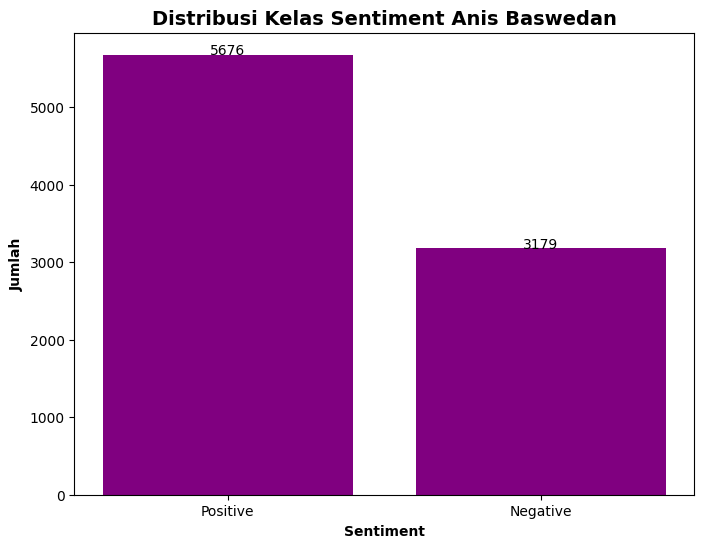

In [32]:
# Kode untuk menghitung distribusi kelas sentiment dan membuat visualisasi
temp = data_anis.groupby('label').count()['Text'].reset_index().sort_values(by='Text', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(temp['label'], temp['Text'], color='purple')

# Menampilkan jumlah keseluruhan data di atas barplot
total_data = temp['Text'].sum()
for i, value in enumerate(temp['Text']):
    plt.text(i, value + 0.5, f'{value}', ha='center', fontsize=10)

plt.xlabel('Sentiment', fontsize=10, fontweight='bold')
plt.ylabel('Jumlah', fontsize=10, fontweight='bold')
plt.title('Distribusi Kelas Sentiment Anis Baswedan', fontsize=14, fontweight='bold')
plt.show()


In [33]:
fig = go.Figure(go.Funnelarea(
    text =data_anis.label,
    values = temp.Text,
    title = {"position": "top center", "text": "Distribusi Sentiment Anis Baswedan"}
    ))
fig.show()

<center><strong>Prabowo Subianto<strong><center>

In [34]:
temp = data_prab.groupby('label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,Text
1,Positive,4996
0,Negative,1761


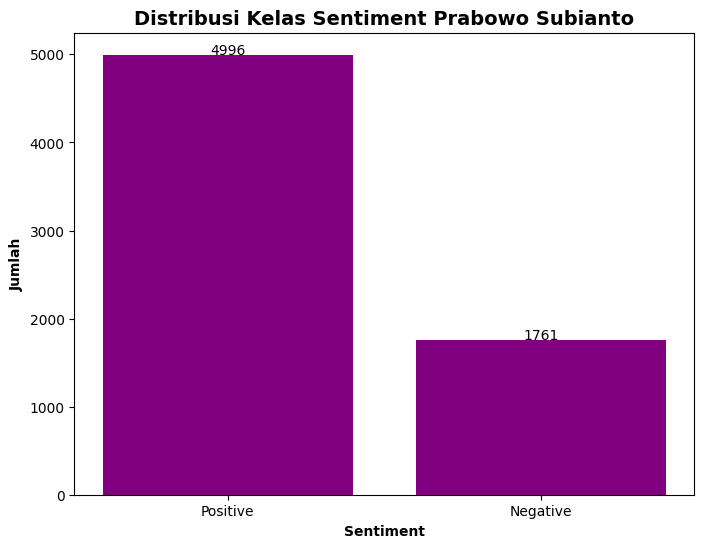

In [35]:

# Kode untuk menghitung distribusi kelas sentiment dan membuat visualisasi
temp = data_prab.groupby('label').count()['Text'].reset_index().sort_values(by='Text', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(temp['label'], temp['Text'], color='purple')

# Menampilkan jumlah keseluruhan data di atas barplot
total_data = temp['Text'].sum()
for i, value in enumerate(temp['Text']):
    plt.text(i, value + 0.5, f'{value}', ha='center', fontsize=10)

plt.xlabel('Sentiment', fontsize=10, fontweight='bold')
plt.ylabel('Jumlah', fontsize=10, fontweight='bold')
plt.title('Distribusi Kelas Sentiment Prabowo Subianto', fontsize=14, fontweight='bold')
plt.show()


In [20]:
fig = go.Figure(go.Funnelarea(
    text =data_prab.label,
    values = temp.Text,
    title = {"position": "top center", "text": "Distribusi Sentiment Prabowo Subianto"}
    ))
fig.show()

In [21]:
temp = data_ganj.groupby('label').count()['Text'].reset_index().sort_values(by='Text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,Text
1,Positive,6217
0,Negative,1617


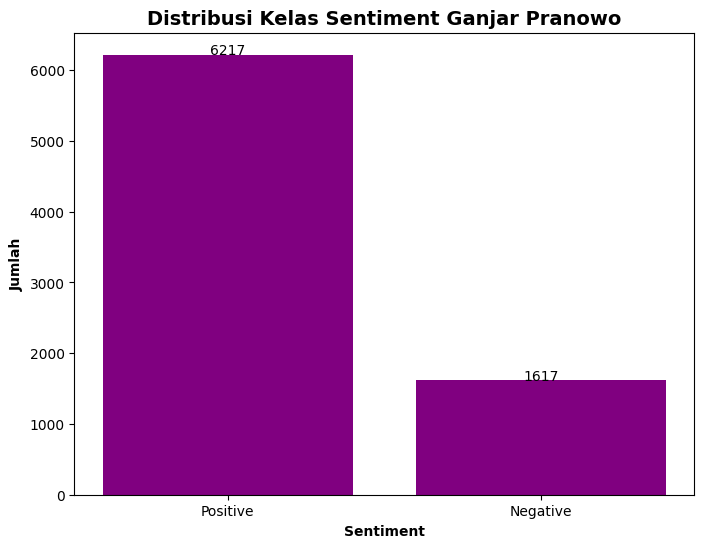

In [22]:
# Kode untuk menghitung distribusi kelas sentiment dan membuat visualisasi
temp = data_ganj.groupby('label').count()['Text'].reset_index().sort_values(by='Text', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(temp['label'], temp['Text'], color='purple')

# Menampilkan jumlah keseluruhan data di atas barplot
total_data = temp['Text'].sum()
for i, value in enumerate(temp['Text']):
    plt.text(i, value + 0.5, f'{value}', ha='center', fontsize=10)

plt.xlabel('Sentiment', fontsize=10, fontweight='bold')
plt.ylabel('Jumlah', fontsize=10, fontweight='bold')
plt.title('Distribusi Kelas Sentiment Ganjar Pranowo', fontsize=14, fontweight='bold')
plt.show()


In [23]:
fig = go.Figure(go.Funnelarea(
    text =data_ganj.label,
    values = temp.Text,
    title = {"position": "top center", "text": "Distribusi Sentiment Ganjar Pranowo"}
    ))
fig.show()

Dari ketiga distribusi diatas dapat disimpulkan:


*   kelas data `label` pada ketiga data tidak balance, dengan kebanyakan **label positif** dibanding **label negatif**, kemungkinan akan terjadi **overfitting**



Mari cari tau kapan saja **ketiga data diperoleh**

In [36]:
data_01 = data_anis.copy()
data_02 = data_prab.copy()
data_03 = data_ganj.copy()

In [25]:
data_01['Date'] = pd.to_datetime(data_01['Date'])
data_02['Date'] = pd.to_datetime(data_02['Date'])
data_03['Date'] = pd.to_datetime(data_03['Date'])

In [26]:
# Hitung jumlah data per bulan
monthly_counts_01 = data_01.groupby(data_01['Date'].dt.to_period('M')).size()
monthly_counts_02 = data_02.groupby(data_02['Date'].dt.to_period('M')).size()
monthly_counts_03 = data_03.groupby(data_03['Date'].dt.to_period('M')).size()
print(monthly_counts_01)
print(monthly_counts_02)
print(monthly_counts_03)

Date
2023-01    3394
2023-02    2509
2023-03    2094
2023-04     858
Freq: M, dtype: int64
Date
2022-12     446
2023-01    1638
2023-02    1434
2023-03    1927
2023-04    1312
Freq: M, dtype: int64
Date
2022-10     436
2022-11    1745
2022-12    1619
2023-01    1128
2023-02     974
2023-03    1245
2023-04     687
Freq: M, dtype: int64


<ipython-input-26-a8f2d0378084>:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

<ipython-input-26-a8f2d0378084>:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

<ipython-input-26-a8f2d0378084>:4: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



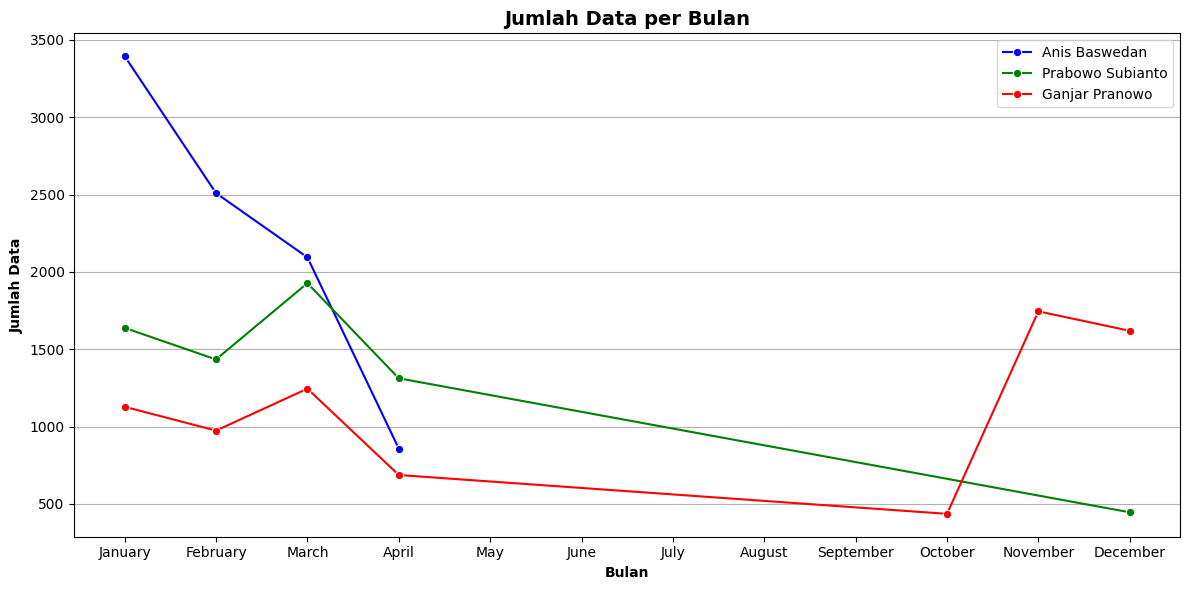

In [27]:
# Buat DataFrame baru dari monthly_counts
monthly_df_01 = pd.DataFrame({'Month': monthly_counts_01.index.to_timestamp().strftime('%B'), 'Count': monthly_counts_01.values})
# Ubah kolom 'Month' menjadi tipe kategori dengan urutan bulan yang benar
monthly_df_01['Month'] = pd.Categorical(monthly_df_01['Month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
# Urutkan DataFrame berdasarkan bulan
monthly_df_01 = monthly_df_01.sort_values(by='Month')
# Reset index setelah pengurutan
monthly_df_01 = monthly_df_01.reset_index(drop=True)
# Buat DataFrame baru dari monthly_counts
monthly_df_02 = pd.DataFrame({'Month': monthly_counts_02.index.to_timestamp().strftime('%B'), 'Count': monthly_counts_02.values})
# Ubah kolom 'Month' menjadi tipe kategori dengan urutan bulan yang benar
monthly_df_02['Month'] = pd.Categorical(monthly_df_02['Month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
# Urutkan DataFrame berdasarkan bulan
monthly_df_02 = monthly_df_02.sort_values(by='Month')
# Reset index setelah pengurutan
monthly_df_02 = monthly_df_02.reset_index(drop=True)
# Buat DataFrame baru dari monthly_counts
monthly_df_03 = pd.DataFrame({'Month': monthly_counts_03.index.to_timestamp().strftime('%B'), 'Count': monthly_counts_03.values})
# Ubah kolom 'Month' menjadi tipe kategori dengan urutan bulan yang benar
monthly_df_03['Month'] = pd.Categorical(monthly_df_03['Month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
# Urutkan DataFrame berdasarkan bulan
monthly_df_03 = monthly_df_03.sort_values(by='Month')
# Reset index setelah pengurutan
monthly_df_03 = monthly_df_03.reset_index(drop=True)
plt.figure(figsize=(12, 6))

# Plot line plot untuk visualisasi jumlah data per bulan
sns.lineplot(x='Month', y='Count', data=monthly_df_01, marker='o', color='b', label='Anis Baswedan')
sns.lineplot(x='Month', y='Count', data=monthly_df_02, marker='o', color='g', label='Prabowo Subianto')
sns.lineplot(x='Month', y='Count', data=monthly_df_03, marker='o', color='r', label='Ganjar Pranowo')

plt.title('Jumlah Data per Bulan', fontsize=14, fontweight='bold')
plt.xlabel('Bulan', fontsize=10, fontweight='bold')
plt.ylabel('Jumlah Data', fontsize=10, fontweight='bold')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [28]:
print('Anis Baswedan')
print(monthly_df_01)
print('Prabowo Subianto')
print(monthly_df_02)
print('Ganjar Pranowo')
print(monthly_df_03)

Anis Baswedan
      Month  Count
0   January   3394
1  February   2509
2     March   2094
3     April    858
Prabowo Subianto
      Month  Count
0   January   1638
1  February   1434
2     March   1927
3     April   1312
4  December    446
Ganjar Pranowo
      Month  Count
0   January   1128
1  February    974
2     March   1245
3     April    687
4   October    436
5  November   1745
6  December   1619


Setiap data calon presiden memiliki jumlah dan pengambilan sample di waktu yang **berbeda beda**

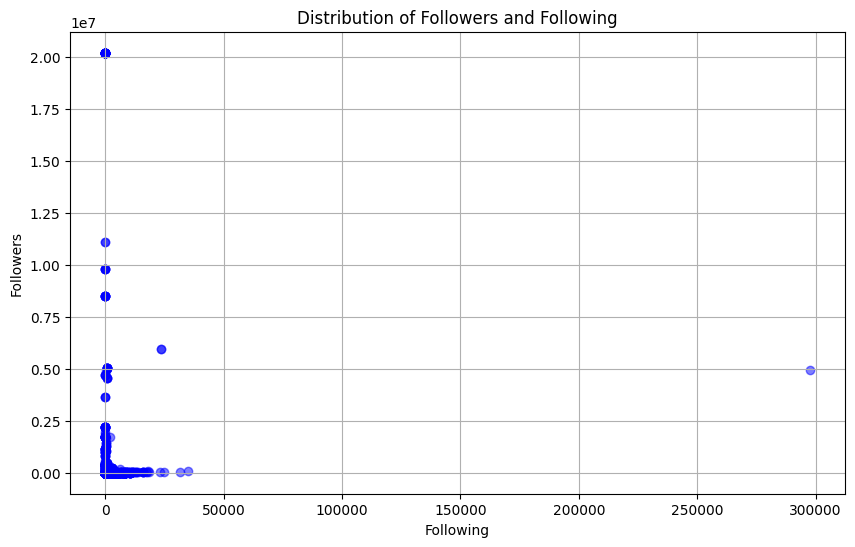

In [29]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_01['Following'], data_01['Followers'], color='blue', alpha=0.5)
plt.title('Distribution of Followers and Following')
plt.xlabel('Following')
plt.ylabel('Followers')
plt.grid(True)
plt.show()

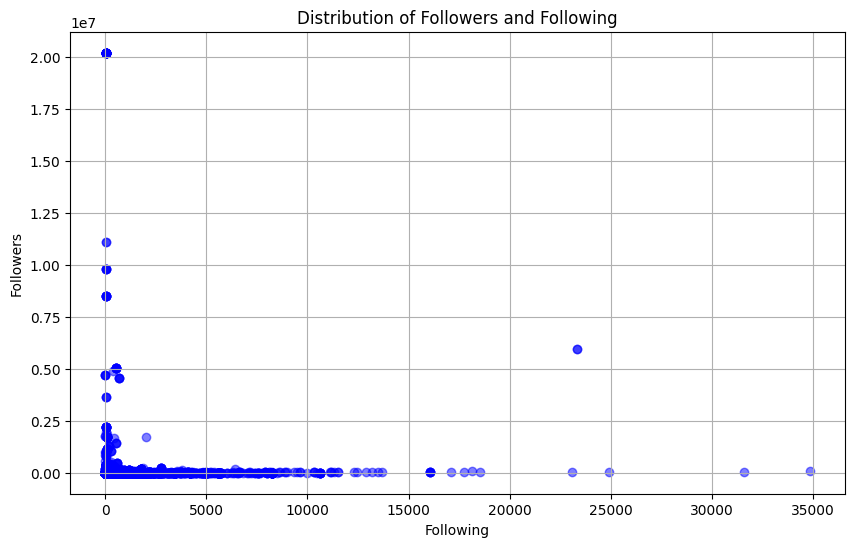

In [ ]:
# Filtering out rows where 'Following' is greater than 50000
data_filtered = data_01[data_01['Following'] <= 50000]
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered['Following'], data_filtered['Followers'], color='blue', alpha=0.5)
plt.title('Distribution of Followers and Following')
plt.xlabel('Following')
plt.ylabel('Followers')
plt.grid(True)
plt.show()

Cek Korelasi antara `Following`, `Followers`, dan Juga `Tweet Count`

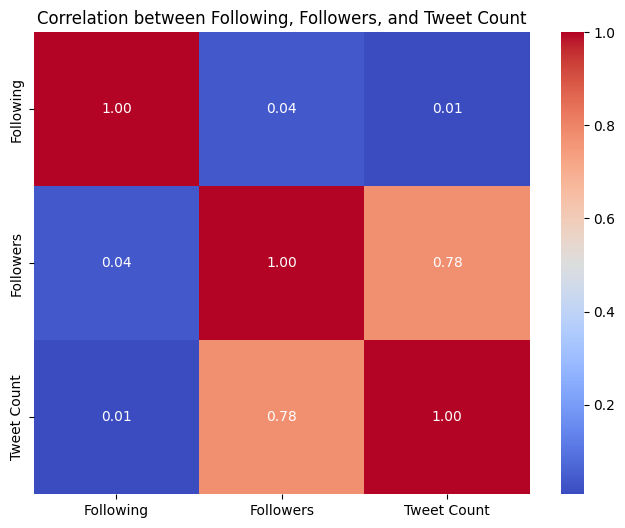

In [30]:
# Selecting only the columns of interest
selected_columns = ['Following', 'Followers', 'Tweet Count']
data_selected = data_01[selected_columns]

# Calculating the correlation matrix
correlation_matrix = data_selected.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Following, Followers, and Tweet Count')
plt.show()

Sepertinya **tidak ada korelasi** yang begitu berarti

Mari kita lihat distribusi kata kata pada setiap capres dengan **wordcloud**

<center><strong>Anis Baswedan<strong><center>

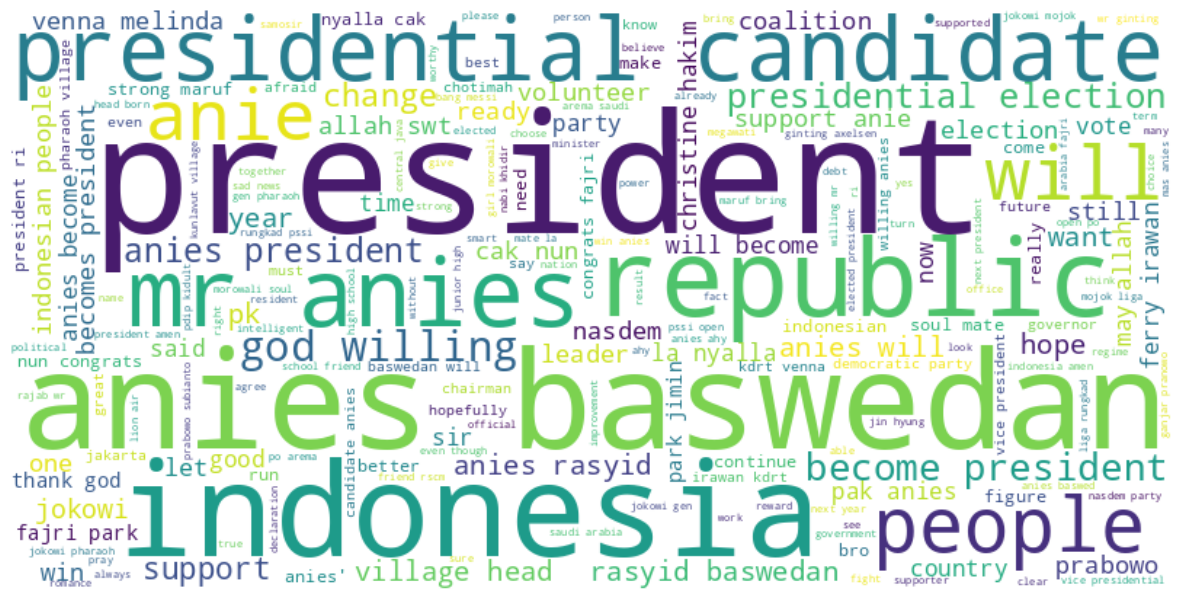

In [ ]:
# Menggabungkan semua teks dalam satu string
text = ' '.join(data_01['Text'].tolist())

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<center><strong>Prabowo Subianto<strong><center>

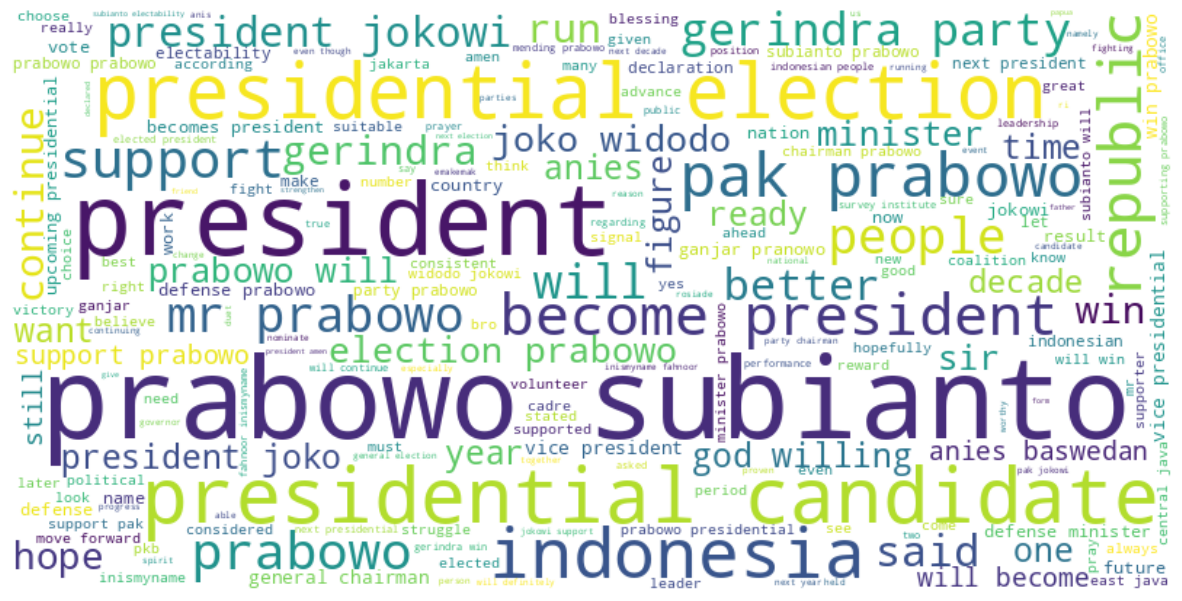

In [ ]:
# Menggabungkan semua teks dalam satu string
text = ' '.join(data_02['Text'].tolist())

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<center><strong>Ganjar Pranowo<strong><center>

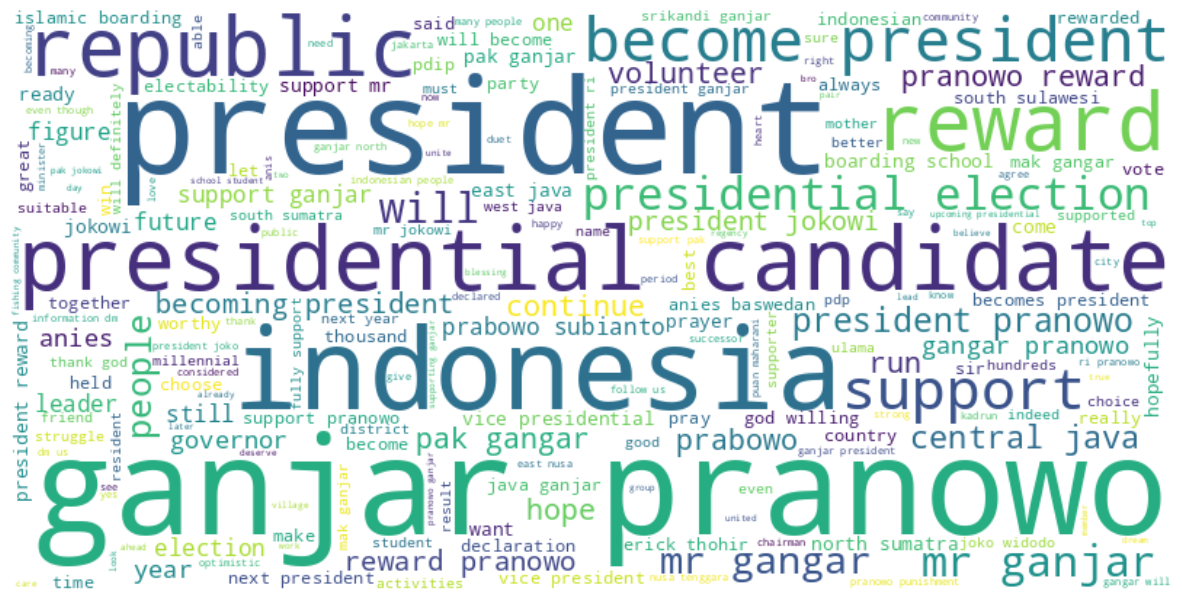

In [ ]:
# Menggabungkan semua teks dalam satu string
text = ' '.join(data_03['Text'].tolist())

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **Preprocessing Text**

Berdasarkan hasil telusuran, **data diperoleh** berdasarkan diagram sebagai berikut:

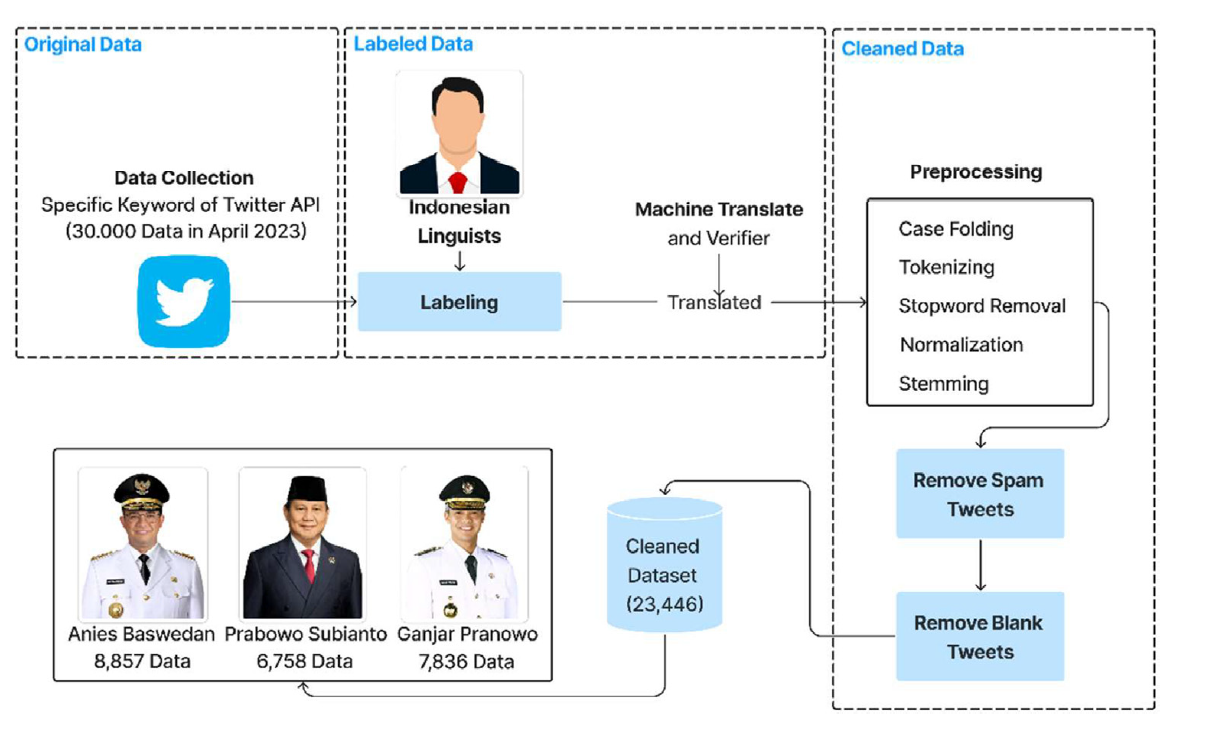

Tahapan ini adalah tahapan **Preprocessing**, data didefinisikan sebagai berikut:
*   `data_01_pre`: Berisi hasil preprocessing **tweet** yang di tujukan ke calon presiden **anis baswedan**
*   `data_02_pre`: Berisi hasil preprocessing **tweet** yang di tujukan ke calon presiden **Prabowo Subianto**
*   `data_03_pre`: Berisi hasil preprocessing**tweet** yang di tujukan ke calon presiden **Ganjar Pranowo**


In [37]:
data_01_pre = data_01[['Text','label']]
data_02_pre = data_03[['Text','label']]
data_03_pre = data_03[['Text','label']]

In [38]:
data_01_pre.head(10)

,Text,label
0,anies president info,Positive
1,gerindra party politician sandiaga uno answers...,Positive
2,"mr. anies continued, we will guard him until h...",Positive
3,may allah swt save the nation and state of the...,Positive
4,"poor chotimah, uncle anies, that's why my fami...",Positive
5,pdip cadres become president where the ministe...,Negative
6,if there is no declaration from the supporting...,Positive
7,the voice of the people,Positive
8,amien rais will vote for prabowo subianto if a...,Negative
9,who was the governor?,Positive


Pada preprocessing Text kali ini akan melibatkan beberapa proses di antaranya ialah sebagai berikut:


1.   **Case Folding**
> **Case folding** adalah proses dalam pengolahan teks yang mengubah semua karakter huruf menjadi huruf kecil (lowercase). Tujuan dari case folding adalah untuk menyamakan representasi teks agar tidak ada perbedaan yang disebabkan oleh perbedaan penulisan huruf besar-kecil. Misalnya, kata "Data" dan "data" sebenarnya sama jika dilihat dari konteks teks, namun karena perbedaan huruf kapital dan huruf kecil, komputer akan memperlakukan keduanya sebagai dua kata yang berbeda jika tidak dilakukan case folding. Proses case folding sering kali digunakan dalam tahap preprocessing teks dalam berbagai tugas pemrosesan bahasa alami (NLP) seperti klasifikasi teks, analisis sentimen, atau pencocokan teks. Hal ini membantu dalam mengurangi kompleksitas dan meningkatkan akurasi dalam pemrosesan teks.
2.   **Tokenizing**
> **Tokenizing** adalah proses membagi sebuah teks atau dokumen menjadi bagian-bagian yang lebih kecil yang disebut token. Token-token ini dapat berupa kata, frasa, atau simbol tertentu, tergantung pada aturan tokenizing yang digunakan. Contoh tokenizing dalam teks adalah sebagai berikut: `Teks: "Saya sedang belajar pemrosesan bahasa alami menggunakan ChatGPT."`
- **["Saya", "sedang", "belajar", "pemrosesan", "bahasa", "alami", "menggunakan", "ChatGPT"]**
> Tokenizing berfungsi sebagai langkah awal dalam pemrosesan teks, yang kemudian dapat diikuti oleh langkah-langkah lain seperti membersihkan, menghilangkan stop words, atau melakukan stemming/lemmatization.

3.   **Stopword Removal**
> **Stopword removal** adalah proses dalam pemrosesan teks yang menghilangkan kata-kata yang umumnya tidak memiliki nilai informatif tinggi dalam analisis teks karena kemunculannya yang sering dalam bahasa tertentu. Kata-kata ini disebut stop words. Contoh stop words dalam bahasa Inggris adalah `"the", "is", "are", "and", "or", "but"`, dan sebagainya. Proses stopword removal menghilangkan kata-kata ini dari teks untuk meningkatkan kualitas analisis teks dengan memfokuskan pada kata-kata yang lebih informatif. Berikut adalah contoh penggunaan stopword removal dalam teks: Teks sebelum stopword removal: **"This is an example sentence with some stop words such as the, is, and, but."** Teks setelah stopword removal: **"This example sentence with some stop words such as."**
4. **Normalization Text**
> **Normalisasi** teks adalah proses mengubah teks menjadi bentuk standar atau normal untuk memfasilitasi analisis dan pemrosesan lebih lanjut. Tujuan normalisasi teks adalah untuk menghilangkan variasi yang tidak diinginkan dalam teks, seperti mengubah huruf menjadi huruf kecil semua, menghilangkan tanda baca, dan menggabungkan kata-kata yang serupa.

5. **Stemming**
> **Stemming** adalah proses dalam pemrosesan bahasa alami di mana kata-kata yang terinfleksi (misalnya, bentuk jamak, waktu, atau kata-kata yang berbeda-beda seperti "berlari" dan "lari") direduksi ke bentuk dasarnya, yang disebut "stem". Tujuan utamanya adalah untuk mengurangi variasi kata ke bentuk dasar atau bentuk yang serupa sehingga kata-kata tersebut dapat dianggap setara dalam konteks analisis teks. Meskipun stemming dapat membantu dalam beberapa kasus, teknik ini tidak selalu sempurna dan bisa menghasilkan stem yang bukan merupakan kata yang valid dalam bahasa yang sedang diproses.

In [39]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def Preprocessing_Text(text):
    # Mengubah teks menjadi lowercase
    text = text.lower()

    # Menghapus karakter khusus dan angka menggunakan regular expression
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenisasi menggunakan NLTK
    tokens = word_tokenize(text)

    # Menghapus stopword dan melakukan stemming
    filtered_tokens = [porter.stem(word) for word in tokens if word.lower() not in stop_words]

    return filtered_tokens

# Contoh penggunaan fungsi pada kolom 'Text' dari dataframe 'data'
data_01_pre['Preprocessing_Text'] = data_01_pre['Text'].apply(Preprocessing_Text)
data_02_pre['Preprocessing_Text'] = data_02_pre['Text'].apply(Preprocessing_Text)
data_03_pre['Preprocessing_Text'] = data_03_pre['Text'].apply(Preprocessing_Text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-39-ceaf96f99f53>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-ceaf96f99f53>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-ceaf96f99f53>:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a 

In [40]:
data_01_pre.head(5)

,Text,label,Preprocessing_Text
0,anies president info,Positive,"[ani, presid, info]"
1,gerindra party politician sandiaga uno answers...,Positive,"[gerindra, parti, politician, sandiaga, uno, a..."
2,"mr. anies continued, we will guard him until h...",Positive,"[mr, ani, continu, guard, becom, presid]"
3,may allah swt save the nation and state of the...,Positive,"[may, allah, swt, save, nation, state, republ,..."
4,"poor chotimah, uncle anies, that's why my fami...",Positive,"[poor, chotimah, uncl, ani, that, famili, deci..."


In [41]:
data_02_pre.head(5)

,Text,label,Preprocessing_Text
0,"ganjar is getting more and more support, now s...",Positive,"[ganjar, get, support, support, come, citi, ba..."
1,ojoo lali yooo who is smart chooses pranowo's ...,Positive,"[ojoo, lali, yooo, smart, choos, pranowo, reward]"
2,smart people support and reward pranowo well,Positive,"[smart, peopl, support, reward, pranowo, well]"
3,we believe that pranowo's reward is a gift fro...,Positive,"[believ, pranowo, reward, gift, allah, almight..."
4,intelligent people support and reward pranowo ...,Positive,"[intellig, peopl, support, reward, pranowo, well]"


In [42]:
data_03_pre.head(5)

,Text,label,Preprocessing_Text
0,"ganjar is getting more and more support, now s...",Positive,"[ganjar, get, support, support, come, citi, ba..."
1,ojoo lali yooo who is smart chooses pranowo's ...,Positive,"[ojoo, lali, yooo, smart, choos, pranowo, reward]"
2,smart people support and reward pranowo well,Positive,"[smart, peopl, support, reward, pranowo, well]"
3,we believe that pranowo's reward is a gift fro...,Positive,"[believ, pranowo, reward, gift, allah, almight..."
4,intelligent people support and reward pranowo ...,Positive,"[intellig, peopl, support, reward, pranowo, well]"


# **Training**

Tahapan ini adalah tahapan **Training**, data didefinisikan sebagai berikut:
*   `data_01_tr`: Berisi **Data Training** yang di tujukan ke calon presiden **anis baswedan**
*   `data_02_tr`: Berisi **Data Training** yang di tujukan ke calon presiden **Prabowo Subianto**
*   `data_03_tr`: Berisi **Data Training** yang di tujukan ke calon presiden **Ganjar Pranowo**




In [43]:
data_01_tr = data_01_pre[['Preprocessing_Text','label']]
data_02_tr = data_02_pre[['Preprocessing_Text','label']]
data_03_tr = data_03_pre[['Preprocessing_Text','label']]

encoding tiap label **Negative** dan **Positive** menjadi label Binary (0,1)

In [45]:
def give_label(label):
    if label == "Negative":
        return 0
    else:
        return 1
data_01_tr["encoded"] = data_01_tr["label"].apply(give_label)
data_02_tr["encoded"] = data_02_tr["label"].apply(give_label)
data_03_tr["encoded"] = data_03_tr["label"].apply(give_label)

In [47]:
# Reset index dari dataframe
data_01_tr = data_01_tr.reset_index(drop=True)

# Mengubah kolom label menjadi kategori
data_01_tr['encoded'] = data_01_tr['encoded'].astype('category')

In [48]:
# Reset index dari dataframe
data_02_tr = data_02_tr.reset_index(drop=True)

# Mengubah kolom label menjadi kategori
data_02_tr['encoded'] = data_02_tr['encoded'].astype('category')

In [49]:
# Reset index dari dataframe
data_03_tr = data_03_tr.reset_index(drop=True)

# Mengubah kolom label menjadi kategori
data_03_tr['encoded'] = data_03_tr['encoded'].astype('category')

Splitting Data menjadi **Training Set** dan **Test Set** menjadi 20%

In [50]:
# Split data menjadi train dan test sets
train_data_01, test_data_01, train_labels_01, test_labels_01 = train_test_split(
    data_01_tr['Preprocessing_Text'], data_01_tr['encoded'], test_size=0.2, random_state=42
)
train_data_02, test_data_02, train_labels_02, test_labels_02 = train_test_split(
    data_02_tr['Preprocessing_Text'], data_02_tr['encoded'], test_size=0.2, random_state=42
)
train_data_03, test_data_03, train_labels_03, test_labels_03 = train_test_split(
    data_03_tr['Preprocessing_Text'], data_03_tr['encoded'], test_size=0.2, random_state=42
)

**Training Data** Anis Baswedan

In [51]:
# Tokenisasi_01
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data_01)

# Sequencing dan padding_01
train_sequences = tokenizer.texts_to_sequences(train_data_01)
test_sequences = tokenizer.texts_to_sequences(test_data_01)

train_padded = pad_sequences(train_sequences, maxlen=50, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=50, padding='post', truncating='post')

**Arsitektur nya bisa di atur sesuai keinginan**

In [52]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense


# Function to create the model
def create_model(i):
    if i == 1:
        model_name = "LSTM-Model"
        model = Sequential([
            Embedding(input_dim=5000, output_dim=16, input_length=50),
            LSTM(64),
            Dense(1, activation='sigmoid')
        ])
    elif i == 2:
        model_name = "RNN-Model"
        model = Sequential([
            Embedding(input_dim=5000, output_dim=16, input_length=50),
            SimpleRNN(64),
            Dense(1, activation='sigmoid')
        ])
    else:
        return None, None
    return model, model_name

# Loop through both models
for i in range(1, 3):
    model, model_name = create_model(i)
    if model is not None:
        print(f"==============================={model_name}===============================")
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Setup ModelCheckpoint callback
        checkpoint = ModelCheckpoint(f'best_model_{i}.keras',
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     mode='max',
                                     verbose=1)

        # Measure the computation time
        start_time = time.time()

        # Train the model with the ModelCheckpoint callback
        history = model.fit(train_padded, train_labels_01.astype(int),
                            epochs=30,
                            validation_data=(test_padded, test_labels_01.astype(int)),
                            callbacks=[checkpoint])

        # End time
        end_time = time.time()
        computation_time = end_time - start_time

        print(f"Total computation time for {model_name}: {computation_time} seconds")
    else:
        print(f"Model creation failed for index {i}.")


===============================LSTM-Model===============================
Epoch 1/30
221/222 [============================>.] - ETA: 0s - loss: 0.6582 - accuracy: 0.6386
Epoch 1: val_accuracy improved from -inf to 0.64370, saving model to best_model_1.keras
222/222 [==============================] - 7s 23ms/step - loss: 0.6582 - accuracy: 0.6386 - val_loss: 0.6170 - val_accuracy: 0.6437
Epoch 2/30
219/222 [============================>.] - ETA: 0s - loss: 0.5608 - accuracy: 0.7374
Epoch 2: val_accuracy improved from 0.64370 to 0.80915, saving model to best_model_1.keras
222/222 [==============================] - 5s 20ms/step - loss: 0.5589 - accuracy: 0.7387 - val_loss: 0.4472 - val_accuracy: 0.8091
Epoch 3/30
221/222 [============================>.] - ETA: 0s - loss: 0.3511 - accuracy: 0.8599
Epoch 3: val_accuracy improved from 0.80915 to 0.84303, saving model to best_model_1.keras
222/222 [==============================] - 5s 21ms/step - loss: 0.3510 - accuracy: 0.8598 - val_loss: 0.3

In [56]:
import time
# Measure the computation time
start_time = time.time()
# Melatih model dengan menggunakan callback ModelCheckpoint
history = model.fit(train_padded, train_labels_01.astype(int),
                    epochs=30,
                    validation_data=(test_padded, test_labels_01.astype(int)),
                    callbacks=[checkpoint])
# End time
end_time = time.time()
computation_time = end_time - start_time

print(f"Total computation time: {computation_time} seconds")

Epoch 1/15
221/222 [============================>.] - ETA: 0s - loss: 0.6577 - accuracy: 0.6349
Epoch 1: val_accuracy improved from -inf to 0.64370, saving model to best_model_01.keras
222/222 [==============================] - 7s 24ms/step - loss: 0.6575 - accuracy: 0.6352 - val_loss: 0.6515 - val_accuracy: 0.6437
Epoch 2/15
222/222 [==============================] - ETA: 0s - loss: 0.6342 - accuracy: 0.6616
Epoch 2: val_accuracy improved from 0.64370 to 0.69226, saving model to best_model_01.keras
222/222 [==============================] - 4s 19ms/step - loss: 0.6342 - accuracy: 0.6616 - val_loss: 0.6165 - val_accuracy: 0.6923
Epoch 3/15
220/222 [============================>.] - ETA: 0s - loss: 0.5695 - accuracy: 0.7403
Epoch 3: val_accuracy improved from 0.69226 to 0.74308, saving model to best_model_01.keras
222/222 [==============================] - 4s 19ms/step - loss: 0.5693 - accuracy: 0.7407 - val_loss: 0.5691 - val_accuracy: 0.7431
Epoch 4/15
222/222 [=======================

KeyboardInterrupt: 

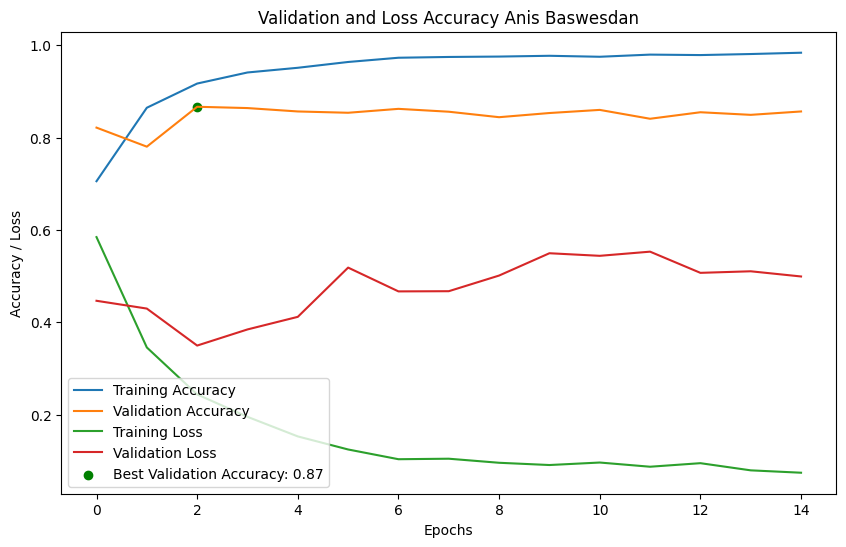

In [ ]:
import matplotlib.pyplot as plt

# Membuat figur dengan ukuran tertentu
plt.figure(figsize=(10, 6))

# Visualisasi hasil pelatihan
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Menandai titik pada skor validasi tertinggi pada model
best_val_accuracy = max(history.history['val_accuracy'])
best_val_accuracy_index = history.history['val_accuracy'].index(best_val_accuracy)
plt.scatter(best_val_accuracy_index, best_val_accuracy, color='green', label=f'Best Validation Accuracy: {best_val_accuracy:.2f}')


# Menambahkan judul dan label sumbu
plt.title('Validation and Loss Accuracy Anis Baswesdan')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
# Tentukan path ke file H5 model
model_path = '/content/best_model_01.h5'

# Memuat model
loaded_model = load_model(model_path)

# Menampilkan ringkasan model yang dimuat
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            80000     
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 100801 (393.75 KB)
Trainable params: 100801 (393.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Memprediksi kelas target pada data uji
predictions = loaded_model.predict(test_padded)

# Konversi prediksi menjadi label kelas (0 atau 1)
predicted_labels = [1 if p > 0.5 else 0 for p in predictions]

# Menampilkan classification report
print('Classification Report:')
print(classification_report(list(test_labels_01), predicted_labels))

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(test_labels_01, predicted_labels)
print('Accuracy:', accuracy)


56/56 [==============================] - 2s 14ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       631
           1       0.90      0.89      0.90      1140

    accuracy                           0.87      1771
   macro avg       0.85      0.86      0.86      1771
weighted avg       0.87      0.87      0.87      1771

Accuracy: 0.8667419536984754


**Training Data** Prabowo Subianto

In [ ]:
# Tokenisasi_02
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data_02)

# Sequencing dan padding_02
train_sequences = tokenizer.texts_to_sequences(train_data_02)
test_sequences = tokenizer.texts_to_sequences(test_data_02)

train_padded = pad_sequences(train_sequences, maxlen=50, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=50, padding='post', truncating='post')

In [ ]:
# Definisi model
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menyusun ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model_02.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

In [ ]:
# Melatih model dengan menggunakan callback ModelCheckpoint
history = model.fit(train_padded, train_labels_02,
                    epochs=15,
                    validation_data=(test_padded, test_labels_02),
                    callbacks=[checkpoint])

Epoch 1/15
194/196 [============================>.] - ETA: 0s - loss: 0.5233 - accuracy: 0.7887
Epoch 1: val_accuracy improved from -inf to 0.80153, saving model to best_model_02.h5
196/196 [==============================] - 14s 50ms/step - loss: 0.5222 - accuracy: 0.7894 - val_loss: 0.4981 - val_accuracy: 0.8015
Epoch 2/15
  7/196 [>.............................] - ETA: 4s - loss: 0.5451 - accuracy: 0.7679

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



196/196 [==============================] - ETA: 0s - loss: 0.5136 - accuracy: 0.7916
Epoch 2: val_accuracy did not improve from 0.80153
196/196 [==============================] - 8s 42ms/step - loss: 0.5136 - accuracy: 0.7916 - val_loss: 0.5009 - val_accuracy: 0.8015
Epoch 3/15
196/196 [==============================] - ETA: 0s - loss: 0.5106 - accuracy: 0.7768
Epoch 3: val_accuracy did not improve from 0.80153
196/196 [==============================] - 11s 57ms/step - loss: 0.5106 - accuracy: 0.7768 - val_loss: 0.4599 - val_accuracy: 0.8015
Epoch 4/15
196/196 [==============================] - ETA: 0s - loss: 0.4562 - accuracy: 0.7916
Epoch 4: val_accuracy did not improve from 0.80153
196/196 [==============================] - 9s 44ms/step - loss: 0.4562 - accuracy: 0.7916 - val_loss: 0.4424 - val_accuracy: 0.8015
Epoch 5/15
195/196 [============================>.] - ETA: 0s - loss: 0.4306 - accuracy: 0.7915
Epoch 5: val_accuracy did not improve from 0.80153
196/196 [=================

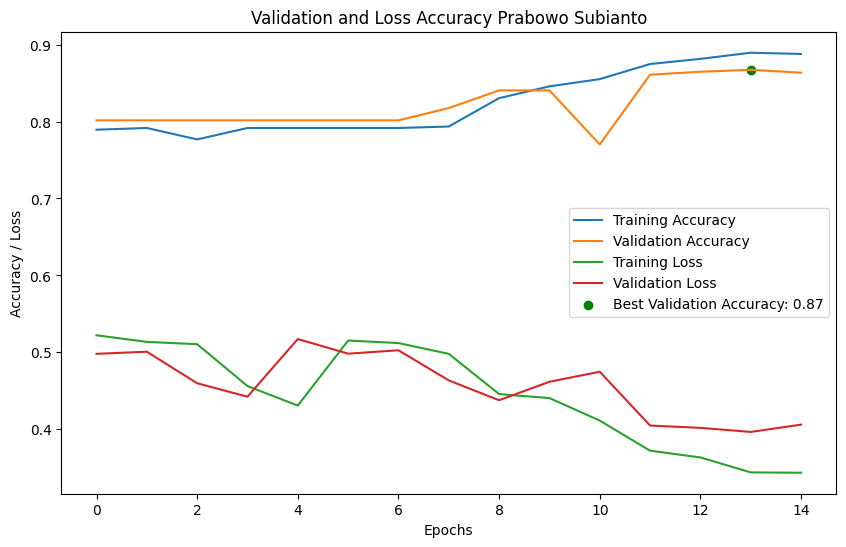

In [ ]:
import matplotlib.pyplot as plt

# Membuat figur dengan ukuran tertentu
plt.figure(figsize=(10, 6))

# Visualisasi hasil pelatihan
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Menandai titik pada skor validasi tertinggi pada model
best_val_accuracy = max(history.history['val_accuracy'])
best_val_accuracy_index = history.history['val_accuracy'].index(best_val_accuracy)
plt.scatter(best_val_accuracy_index, best_val_accuracy, color='green', label=f'Best Validation Accuracy: {best_val_accuracy:.2f}')


# Menambahkan judul dan label sumbu
plt.title('Validation and Loss Accuracy Prabowo Subianto')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
# Tentukan path ke file H5 model
model_path = '/content/best_model_02.h5'

# Memuat model
loaded_model = load_model(model_path)

# Menampilkan ringkasan model yang dimuat
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            80000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                20736     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 100801 (393.75 KB)
Trainable params: 100801 (393.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Memprediksi kelas target pada data uji
predictions = loaded_model.predict(test_padded)

# Konversi prediksi menjadi label kelas (0 atau 1)
predicted_labels = [1 if p > 0.5 else 0 for p in predictions]

# Menampilkan classification report
print('Classification Report:')
print(classification_report(list(test_labels_02), predicted_labels))

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(test_labels_02, predicted_labels)
print('Accuracy:', accuracy)


49/49 [==============================] - 1s 16ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.41      0.55       311
           1       0.87      0.98      0.92      1256

    accuracy                           0.87      1567
   macro avg       0.85      0.70      0.74      1567
weighted avg       0.86      0.87      0.85      1567

Accuracy: 0.8672622846202935


**Training Data** Ganjar Pranowo

In [ ]:
# Tokenisasi_03
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data_03)

# Sequencing dan padding_03
train_sequences = tokenizer.texts_to_sequences(train_data_03)
test_sequences = tokenizer.texts_to_sequences(test_data_03)

train_padded = pad_sequences(train_sequences, maxlen=50, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=50, padding='post', truncating='post')

In [ ]:
# Definisi model
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Menyusun ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model_03.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

In [ ]:
# Melatih model dengan menggunakan callback ModelCheckpoint
history = model.fit(train_padded, train_labels_03,
                    epochs=15,
                    validation_data=(test_padded, test_labels_03),
                    callbacks=[checkpoint])

Epoch 1/15
196/196 [==============================] - ETA: 0s - loss: 0.5255 - accuracy: 0.7887
Epoch 1: val_accuracy improved from -inf to 0.80153, saving model to best_model_03.h5
196/196 [==============================] - 9s 34ms/step - loss: 0.5255 - accuracy: 0.7887 - val_loss: 0.4988 - val_accuracy: 0.8015
Epoch 2/15
196/196 [==============================] - ETA: 0s - loss: 0.5085 - accuracy: 0.7854
Epoch 2: val_accuracy did not improve from 0.80153
196/196 [==============================] - 6s 31ms/step - loss: 0.5085 - accuracy: 0.7854 - val_loss: 0.5097 - val_accuracy: 0.8015
Epoch 3/15
196/196 [==============================] - ETA: 0s - loss: 0.3977 - accuracy: 0.8475
Epoch 3: val_accuracy improved from 0.80153 to 0.87875, saving model to best_model_03.h5
196/196 [==============================] - 6s 29ms/step - loss: 0.3977 - accuracy: 0.8475 - val_loss: 0.3567 - val_accuracy: 0.8787
Epoch 4/15
195/196 [============================>.] - ETA: 0s - loss: 0.3319 - accuracy: 0

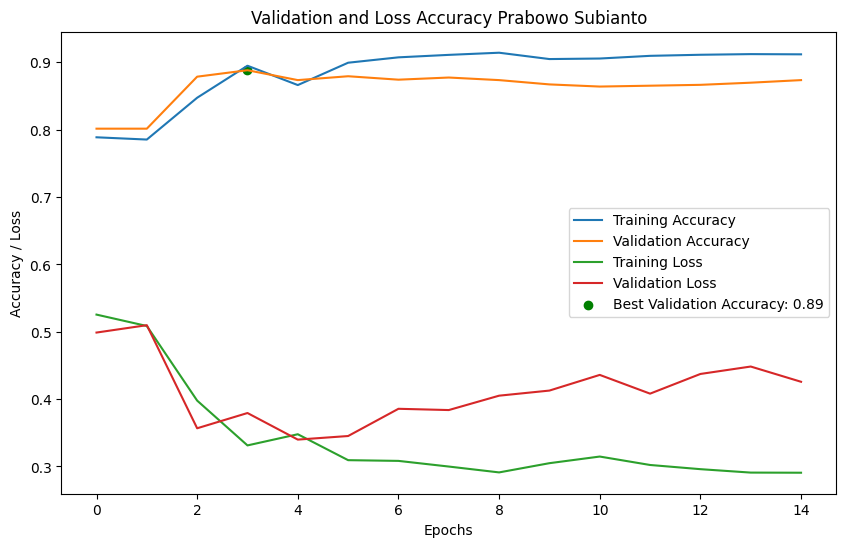

In [ ]:
import matplotlib.pyplot as plt

# Membuat figur dengan ukuran tertentu
plt.figure(figsize=(10, 6))

# Visualisasi hasil pelatihan
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Menandai titik pada skor validasi tertinggi pada model
best_val_accuracy = max(history.history['val_accuracy'])
best_val_accuracy_index = history.history['val_accuracy'].index(best_val_accuracy)
plt.scatter(best_val_accuracy_index, best_val_accuracy, color='green', label=f'Best Validation Accuracy: {best_val_accuracy:.2f}')


# Menambahkan judul dan label sumbu
plt.title('Validation and Loss Accuracy Prabowo Subianto')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
# Tentukan path ke file H5 model
model_path = '/content/best_model_03.h5'

# Memuat model
loaded_model = load_model(model_path)

# Menampilkan ringkasan model yang dimuat
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 16)            80000     
                                                                 
 lstm_4 (LSTM)               (None, 64)                20736     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 100801 (393.75 KB)
Trainable params: 100801 (393.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Memprediksi kelas target pada data uji
predictions = loaded_model.predict(test_padded)

# Konversi prediksi menjadi label kelas (0 atau 1)
predicted_labels = [1 if p > 0.5 else 0 for p in predictions]

# Menampilkan classification report
print('Classification Report:')
print(classification_report(list(test_labels_03), predicted_labels))

# Menghitung dan mencetak akurasi
accuracy = accuracy_score(test_labels_03, predicted_labels)
print('Accuracy:', accuracy)


49/49 [==============================] - 1s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.56      0.67       311
           1       0.90      0.97      0.93      1256

    accuracy                           0.89      1567
   macro avg       0.86      0.76      0.80      1567
weighted avg       0.88      0.89      0.88      1567

Accuracy: 0.8883216336949585
